# Polynomial Fitting

In this notebook, we will implement linear regression and use it to fit polynomials to a given set of points.

For example, suppose you perform a scientific experiment where you vary an independent variable and measure the impact on a dependent variable. This will produce a set of `(x, y)` pairs. To understand the relationship between the independent and dependent variable, you will want to fit a polynomial to this set of points.

Fitting a line (degree one polynomial) to 2 points is easy to do by hand, but in real life we have two additional complications:

1. The points may be noisy (i.e. there is no low-degree polynomial that fits them nicely - you may require something like a degree N-1 polynomial to fit the N points exactly)
2. You may want to fit a polynomial whose degree exceeds 1

To solve both these problems, we can use linear regression.

Before you get started, read to page 11 of the following document:

http://cs229.stanford.edu/notes/cs229-notes1.pdf

*Note: Make sure you have Anaconda installed*

In [17]:
import numpy
np = numpy
def to_feature_vector(x, degree):
    """
    Given a real number representing an x value, as well as the degree of
    the polynomial being fit, create a feature vector from the x value.
    
    We will take all the feature vectors (treated as row vectors) and stack
    them on top of each other to construct the matrix X that we pass into
    the normal_equation function.
    
    So, if there are N training examples and you decide to create a
    feature vector of length D in this function, then the matrix X will
    have size NxD.
    
    @param x - The real number representing the x value.
    @param degree - The degree of the polynomial being fit.
    @return An array representing the feature vector associated with the given x value
        for a polynomial with the given degree.
    """
    
    # suppose degree = 3, then x should turn into [1, x, x^2, x^3]
    # This isn't great because it's using a for loop instead of a vector op
    
    # return np.array([x ** i for i in range(degree + 1)])
    
    # Don't want to use above because that recomputes powers
    feature_vector = [1]
    for i in range(degree):
        feature_vector.append(feature_vector[-1] * x)
    return np.array(feature_vector)


def normal_equation(X, y):
    """
    Given an NxD matrix X and a Nx1 column vector y, perform linear
    regression. That is, implement the equation on page 11 of:
    
    http://cs229.stanford.edu/notes/cs229-notes1.pdf
    
    Note: To transpose a matrix or vector (call it K), do K.T or np.transpose(K).
    
    You may find the following links helpful:
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html
    
    @param X - The matrix of feature vectors (also called the design matrix).
    @param y - The labels (or y value) associated with each feature vector.
    @return theta, the coefficients of the linear regression.
    """
    # This is inefficient, because it computes the inverse.
    # return np.linalg.inv(X.T @ X) @ (X.T @ y)
    # suppose T = X.T
    # We're looking for ans = (T * X)^-1 * (T * y)
    # This is faster, since it doesn't compute the inverse
    return np.linalg.solve(X.T @ X, X.T @ y)

In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt

def random_polynomial(degree=None):
    """
    Generate a random polynomial of the given degree.
    
    @return a list of coefficients where coefficients[i] is the coefficient of x^i.
    """
    return np.random.uniform(-2, 2, degree or random.randint(1, 6))

def polynomial_to_string(polynomial):
    """
    Convert the polynomial into a string.
    """
    return 'f(x) = ' + str(polynomial[0]) + ''.join(
        ' {prefix} {coeff} * x^{i}'.format(
            prefix='+' if polynomial[i] > 0 else '-',
            coeff=abs(polynomial[i]),
            i=i,
        ) for i in range(1, len(polynomial))
    )

def generate_dataset(
    polynomial=None,
    num_points=100,
    min_x=-10,
    max_x=10,
    noise_sigma=None,
):
    """
    Generate some sample data from the given polynomial.
    
    @param polynomial - The polynomial. If None, we generate a random polynomial.
    @param num_points - The number of points to sample from the polynomial.
    @param min_x - The input x-values to the polynomial will be at least this value.
    @param max_x - The input x-values to the polynomial will be at most this value.
    @param noise_sigma - If None, we simply sample from the polynomial. Otherwise,
        we apply some random Gaussian noise to each sampled y-value. The Gaussian
        is centered at zero with standard deviation = noise_sigma.
    
    @return A triple of the form: (polynomial, array of x values, array of y values).
    """
    # Generate a random polynomial unless one is provided.
    polynomial = polynomial if polynomial is not None else random_polynomial()
    
    # Generate some sample x values.
    x_values = np.random.uniform(min_x, max_x, num_points)
    
    # Compute the the polynomial at each of the x values.
    y_values_raw = np.polynomial.polynomial.polyval(x_values, polynomial)
    
    # If the user asked for noise, apply Gaussian noise to the inputs.
    noise = np.random.normal(0, noise_sigma or 0, num_points)
    
    return (polynomial, x_values, y_values_raw + noise)

def evaluate_linear_regression(polynomial, x_values, y_values, degree):
    """
    Given a polynomial and some points sampled from it, fit a linear regression
    model of the given degree to the points.
    
    Display the actual and predicted polynomial along with plots of the points
    and the predicted polynomial.
    """
    plt.plot(x_values, y_values, 'o')
    
    estimated_polynomial = fit_linear_regression(x_values, y_values, degree)
    polynomial_x_values = np.linspace(min(x_values), max(x_values), 1000)
    polynomial_y_values = np.polynomial.polynomial.polyval(polynomial_x_values, estimated_polynomial)
    plt.plot(polynomial_x_values, polynomial_y_values, '-')
    print('Actual Polynomial: ', polynomial_to_string(polynomial))
    print('Your Prediction: ', polynomial_to_string(estimated_polynomial))
    plt.show()

def fit_linear_regression(x_values, y_values, degree):
    """
    Fit a polynomial to the given data.
    
    @param x_values - An array of real numbers representing the x values.
    @param y_values - An array of real numbers representing the y values.
        So, (x_values[i], y_values[i]) is a training example.
    @param degree - The degree of the polynomial to fit.
    
    @return The polynomial of the given degree that is fit to the given points.
    """
    X = np.array([to_feature_vector(x, degree) for x in x_values])
    return normal_equation(X, y_values.T)


Actual Polynomial:  f(x) = 4 + 3 * x^1 + 2 * x^2
Your Prediction:  f(x) = 3.9999999999999445 + 3.0000000000000018 * x^1 + 2.0000000000000018 * x^2


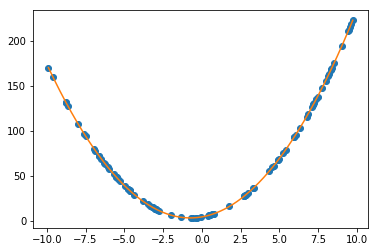

In [19]:
# Test 1: Let's try fitting the polynomial 2x^2 + 3x + 4.
evaluate_linear_regression(
    *generate_dataset(
        polynomial=[4, 3, 2],
    ),
    degree=2,
)

Actual Polynomial:  f(x) = 4 + 3 * x^1 + 2 * x^2
Your Prediction:  f(x) = 5.640070983531288 + 2.7586603239747682 * x^1 + 1.949791917602345 * x^2


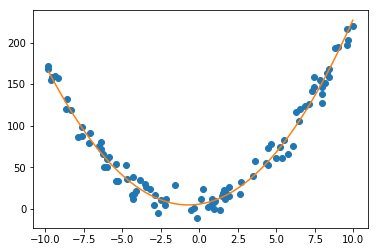

In [20]:
# Test 2: Let's try fitting the polynomial 2x^2 + 3x + 4, but where we have added noise to the points.
evaluate_linear_regression(
    *generate_dataset(
        polynomial=[4, 3, 2],
        noise_sigma=10,
    ),
    degree=2,
)

Actual Polynomial:  f(x) = 4 + 3 * x^1 + 2 * x^2
Your Prediction:  f(x) = 3.9999999999999436 + 3.0000000000000013 * x^1 + 2.0000000000000013 * x^2 - 5.2611119922485876e-17 * x^3


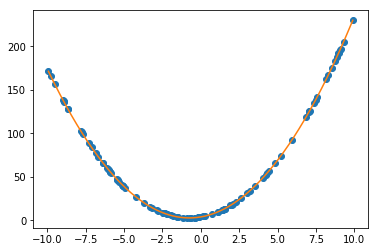

In [21]:
# Test 3: Let's try fitting the polynomial 2x^2 + 3x + 4, with a cubic.
evaluate_linear_regression(
    *generate_dataset(
        polynomial=[4, 3, 2],
    ),
    degree=3,
)

Actual Polynomial:  f(x) = 4 + 3 * x^1 + 2 * x^2
Your Prediction:  f(x) = 82.5522228538207 + 1.406143975615587 * x^1


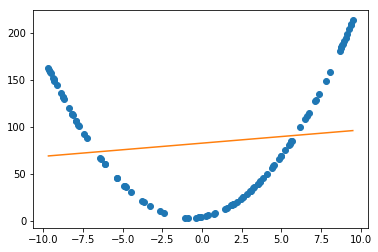

In [22]:
# Test 4: Let's try fitting the polynomial 2x^2 + 3x + 4, with a line.
evaluate_linear_regression(
    *generate_dataset(
        polynomial=[4, 3, 2],
    ),
    degree=1,
)

In [23]:
# Let's generate a random polynomial with some noise.
(polynomial, x_values, y_values) = generate_dataset(noise_sigma=3)

Actual Polynomial:  f(x) = -0.22948346982728784 - 1.0657822046505143 * x^1 - 0.5913735918998859 * x^2 + 1.497115146551216 * x^3
Your Prediction:  f(x) = -47.41208135762923 + 79.62411614867439 * x^1 + 1.3999920835763275 * x^2


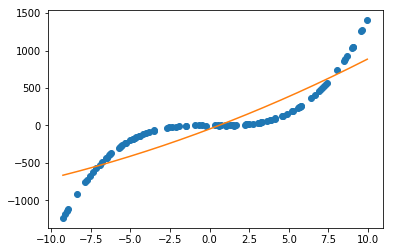

In [24]:
# Test 5: Let's fit that random polynomial.
evaluate_linear_regression(polynomial, x_values, y_values, 2)